In [1]:
import numpy as np, prjlib, plottools as pl, healpy as hp, pickle, curvedsky as cs, tools_delens, tools_lens, tools_multitracer, tqdm, binning as bn
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [22]:
glob = prjlib.analysis_init(freq='com')
qobj = tools_lens.init_qobj(glob.stag,False,rlmin=300,rlmax=4096)
mobj = tools_multitracer.mass_tracer(glob,qobj,add_cmb=['TT'],add_gal=np.arange(0),add_cib=True)

In [23]:
sigcov, clnlmat = tools_multitracer.get_spectra_matrix( mobj )

In [24]:
print(np.shape(sigcov))

(2, 2, 2008)


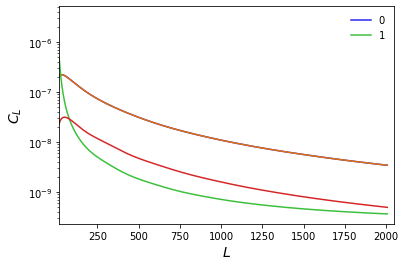

In [25]:
pl.plot_1dstyle(ylog=True)
for i in range(len(sigcov[:,0,0])):
    plot(sigcov[i,i],label=str(i))
    plot(sigcov[0,i])
legend()

In [26]:
weight = tools_multitracer.calculate_multitracer_weights( clnlmat[1:,1:,:], sigcov[0,1:,:], mobj.lmin )

In [27]:
print(np.shape(weight))

(1, 2008)


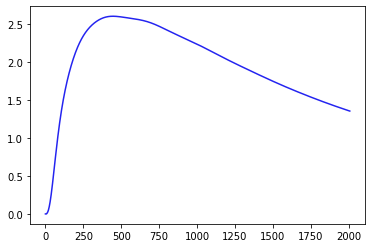

In [33]:
for i in range(len(weight[:,0])):
    plot(weight[i])

In [29]:
rho = np.zeros(len(weight[0]))
for l in range(mobj.lmin,len(weight[0])):
    rho[l] = np.sum(weight[:,l]*sigcov[0,1:,l])/sigcov[0,0,l]

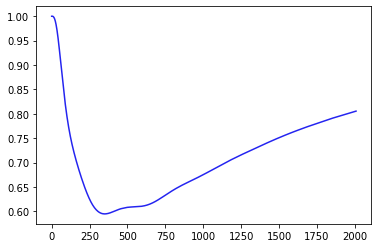

In [30]:
plot(1-rho)